# PDS ASSIGNMENT 3

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np

# Load the diabetes dataset
df = pd.read_csv("diabetes.csv")

# Set a random seed for reproducibility
np.random.seed(42)

# Draw a random sample of 25 observations
sample_df = df.sample(n=25)

# --- Sample Statistics ---
sample_mean = round(sample_df['Glucose'].mean(), 2)
sample_max = sample_df['Glucose'].max()

# --- Population Statistics ---
population_mean = round(df['Glucose'].mean(), 2)
population_max = df['Glucose'].max()

# --- Print the Results ---
print(f"Sample Mean Glucose Level: {sample_mean}")
print(f"Sample Highest Glucose Level: {sample_max}")
print(f"Population Mean Glucose Level: {population_mean}")
print(f"Population Highest Glucose Level: {population_max}")

Sample Mean Glucose Level: 116.64
Sample Highest Glucose Level: 183
Population Mean Glucose Level: 120.89
Population Highest Glucose Level: 199


<ipython-input-4-ec77117ea5e2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='Statistic', y='Glucose Value', data=plot_df, palette='Set2')


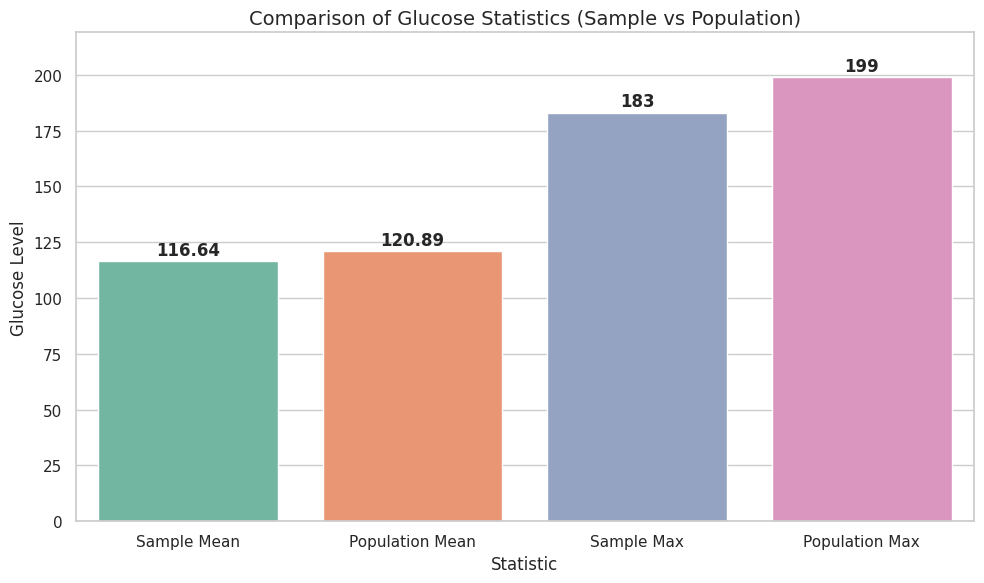

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define categories and corresponding values
categories = ['Sample Mean', 'Population Mean', 'Sample Max', 'Population Max']
values = [sample_mean, population_mean, sample_max, population_max]

# Create a DataFrame
plot_df = pd.DataFrame({'Statistic': categories, 'Glucose Value': values})

# Set a consistent style
sns.set(style='whitegrid')

# Plot
plt.figure(figsize=(10, 6))
bar = sns.barplot(x='Statistic', y='Glucose Value', data=plot_df, palette='Set2')

# Annotate each bar with its value
for i, val in enumerate(values):
    bar.text(i, val + 1, f"{val}", ha='center', va='bottom', fontweight='bold')

# Styling
plt.title('Comparison of Glucose Statistics (Sample vs Population)', fontsize=14)
plt.ylabel('Glucose Level')
plt.xlabel('Statistic')
plt.ylim(0, max(values) + 20)
plt.tight_layout()
plt.show()

In [5]:
import numpy as np

# Compute 98th percentile BMI for sample
sample_bmi_98 = round(np.percentile(sample_df['BMI'], 98), 2)
print(f"98th Percentile BMI (Sample): {sample_bmi_98}")

# Compute 98th percentile BMI for population
population_bmi_98 = round(np.percentile(df['BMI'], 98), 2)
print(f"98th Percentile BMI (Population): {population_bmi_98}")

98th Percentile BMI (Sample): 40.25
98th Percentile BMI (Population): 47.53


<ipython-input-6-8c2676620b20>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=bmi_98th_values, palette=['orange', 'brown'])


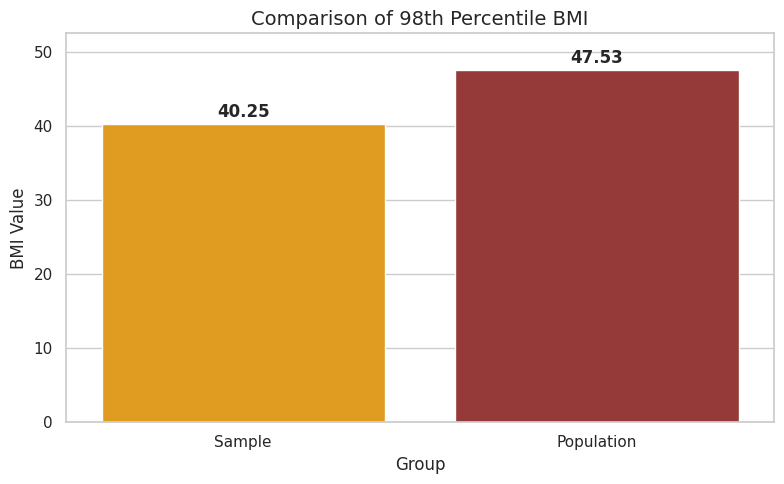

In [6]:
# Data for plotting
labels = ['Sample', 'Population']
bmi_98th_values = [sample_bmi_98, population_bmi_98]

# Set plot style
sns.set(style='whitegrid')

# Create barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=bmi_98th_values, palette=['orange', 'brown'])

# Annotate the bars
for i, val in enumerate(bmi_98th_values):
    plt.text(i, val + 0.5, f"{val}", ha='center', va='bottom', fontweight='bold')

# Labels and title
plt.title('Comparison of 98th Percentile BMI', fontsize=14)
plt.ylabel('BMI Value')
plt.xlabel('Group')
plt.ylim(0, max(bmi_98th_values) + 5)
plt.tight_layout()
plt.show()

In [7]:
# Function to compute bootstrap statistics
def bootstrap_statistics(data, n_samples=500, sample_size=150):
    means = []
    stds = []
    medians = []

    for _ in range(n_samples):
        # Draw sample with replacement
        sample = data.sample(n=sample_size, replace=True)

        # Collect statistics from the sample
        means.append(sample['BloodPressure'].mean())
        stds.append(sample['BloodPressure'].std())
        medians.append(np.percentile(sample['BloodPressure'], 50))  # Median

    return means, stds, medians

# Run bootstrap on BloodPressure column
bs_means, bs_stds, bs_medians = bootstrap_statistics(df)

# Compute population statistics from the full dataset
pop_mean = round(df['BloodPressure'].mean(), 2)
pop_std = round(df['BloodPressure'].std(), 2)
pop_median = round(np.percentile(df['BloodPressure'], 50), 2)

# Print results
print(f"Population Mean Blood Pressure: {pop_mean}")
print(f"Population Standard Deviation: {pop_std}")
print(f"Population Median Blood Pressure: {pop_median}")

Population Mean Blood Pressure: 69.11
Population Standard Deviation: 19.36
Population Median Blood Pressure: 72.0


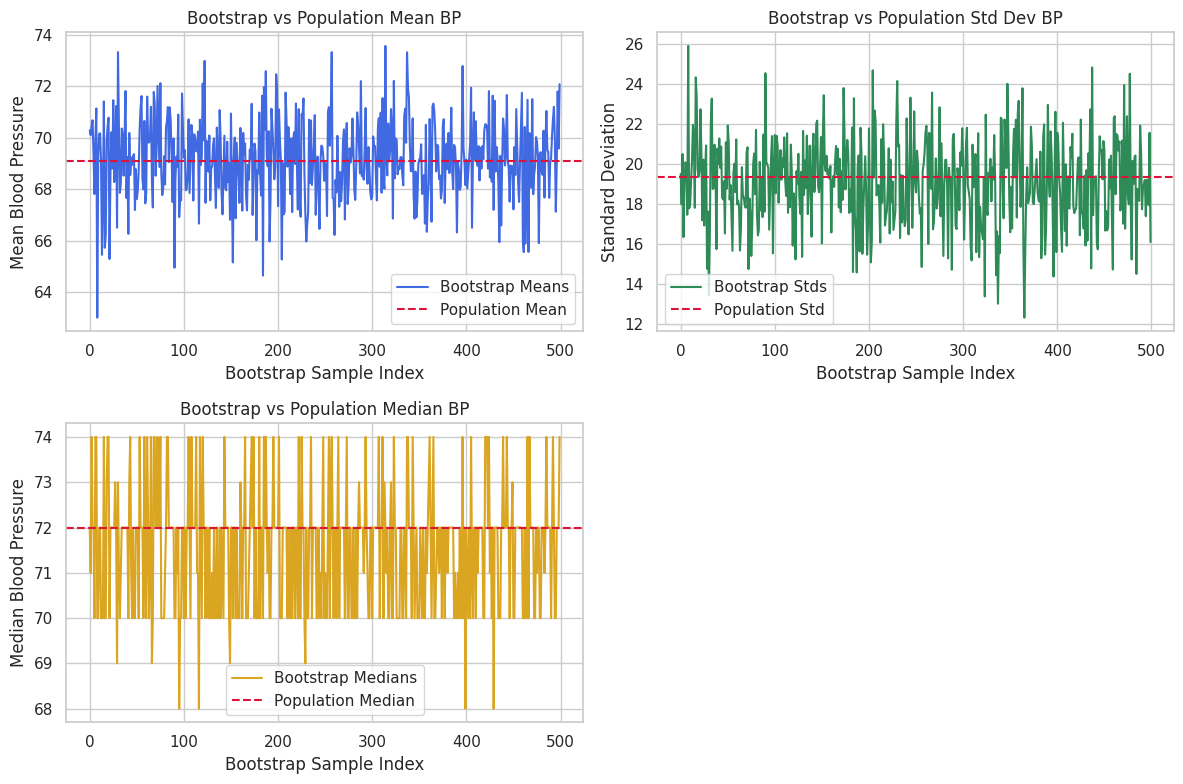

In [13]:


# Set consistent style
sns.set(style="whitegrid")

# Create a 2x2 subplot for statistics comparison
plt.figure(figsize=(12, 8))

# --- 1. Mean ---
plt.subplot(2, 2, 1)
sns.lineplot(x=range(len(bs_means)), y=bs_means, color='royalblue', label='Bootstrap Means')
plt.axhline(pop_mean, color='crimson', linestyle='--', label='Population Mean')
plt.title('Bootstrap vs Population Mean BP')
plt.xlabel('Bootstrap Sample Index')
plt.ylabel('Mean Blood Pressure')
plt.legend()

# --- 2. Standard Deviation ---
plt.subplot(2, 2, 2)
sns.lineplot(x=range(len(bs_stds)), y=bs_stds, color='seagreen', label='Bootstrap Stds')
plt.axhline(pop_std, color='crimson', linestyle='--', label='Population Std')
plt.title('Bootstrap vs Population Std Dev BP')
plt.xlabel('Bootstrap Sample Index')
plt.ylabel('Standard Deviation')
plt.legend()

# --- 3. 50th Percentile (Median) ---
plt.subplot(2, 2, 3)
sns.lineplot(x=range(len(bs_medians)), y=bs_medians, color='goldenrod', label='Bootstrap Medians')
plt.axhline(pop_median, color='crimson', linestyle='--', label='Population Median')
plt.title('Bootstrap vs Population Median BP')
plt.xlabel('Bootstrap Sample Index')
plt.ylabel('Median Blood Pressure')
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()